/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


total_predicted_quantity:  66687.5
Mean squared error: 0.21
Root Mean squared error: 0.46


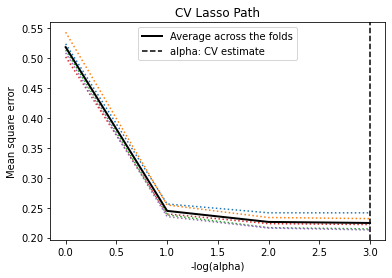

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## import data
df = pd.read_csv('sales_latest.csv')

# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Extract features from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

# Define the features and target variable
features = ['year', 'month', 'day', 'day_of_week', 'week_number', 'unit_buying_price', 'unit_selling_price', 'unit_price_margin', 'total_selling_price', 'total_profit']
target = ['quantity']

# Split the 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train a LassoCV model for model selection
model = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0])
model.fit(X_train[features], y_train[target])

# Print the selected regularization strength alpha
#print('Selected alpha: {:.3f}'.format(model.alpha_))

#  the coefficients of the selected model
coeffs = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})

# Predict on the test set
y_pred = model.predict(X_test[features])
total_predicted_quantity = round(sum(list(y_pred)), 1)
print('total_predicted_quantity: ', total_predicted_quantity)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: {:.2f}'.format(mse))
rmse = math.sqrt(mse)
print('Root Mean squared error: {:.2f}'.format(rmse))
# Plot CV
# Plot results
m_log_alphas = -np.log10(model.alphas_)
plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('CV Lasso Path')
plt.axis('tight')
plt.show()

# Generate future dates to predict sales for
#future_dates = pd.date_range(start='2017-10-29', periods=3, freq='MS')

# Create a dataframe of future dates and corresponding month and year columns
#future_data = pd.DataFrame({'date': future_dates})
#future_data['month'] = future_data['date'].dt.month
#future_data['year'] = future_data['date'].dt.year

# Make predictions for future dates
#predicted_sales = model.predict(future_data)

# Display predicted sale quantities for next 3 months
#print(predicted_sales)


